In [1]:
import networkx as nx
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from scipy.stats import norm
import pickle

In [2]:
def draw_graph(G):
  pos = nx.spring_layout(G)
  nx.draw(G, pos=pos, with_labels=True)
  plt.savefig('fig.png',bbox_inches='tight')

In [3]:
def make_erdos_renyi_graph(node_num, prob):
  G = nx.erdos_renyi_graph(n=node_num, p=prob)
  draw_graph(G)

In [4]:
def make_barabasi_albert_graph(node_num, attach_num):
  G = nx.barabasi_albert_graph(n=node_num, m=attach_num)
  draw_graph(G)

In [5]:
def make_watts_strogatz_graph(node_num, prob, k_nearest):
  G = nx.watts_strogatz_graph(n=node_num,k=k_nearest, p=prob)
  print(G)
  draw_graph(G)

In [6]:
import networkx as nx
import numpy as np
import random
import time
import matplotlib.pyplot as plt
def magic (number_nodes, mode, sub_mode, eliminated_number, probability=0, new_node_edges=0, neighbors=0):
  
  if mode == 1: 
    G = nx.erdos_renyi_graph(n=number_nodes, p=probability)
  elif mode == 2: 
    G = nx.barabasi_albert_graph(n= number_nodes, m= new_node_edges)
  elif mode == 3:
    G = nx.watts_strogatz_graph(n=number_nodes,k=neighbors, p=probability)
  elif mode == 4: 
    G = nx.erdos_renyi_graph(n=number_nodes, p=probability, directed=True)

    

  if sub_mode == 0:
  
    edges = list(G.edges())
    indices_edges = [i for i in range(len(edges))]
    if len(edges) < eliminated_number:
        eliminated_number = len(edges)
    selected_edges = list(np.random.choice(indices_edges, eliminated_number, replace = False))


    for i in selected_edges:
      G.remove_edge(edges[i][0], edges[i][1])
  elif sub_mode == 1:
    nodes = list(G.nodes())
    indices_nodes = [i for i in range(len(nodes))]
    temp_eliminated_number = eliminated_number
    if len(nodes) - 1 < eliminated_number:
      eliminated_number = len(nodes) - 1
    if number_nodes - 1 <= temp_eliminated_number:
      return 0, number_nodes, 0, 0
    selected_nodes = list(np.random.choice(indices_nodes, eliminated_number, replace = False))
    for i in selected_nodes:
      G.remove_node(nodes[i])

  connectivity = 0
  weak_connectivity = 0
  strong_connectivity = 0

  if mode != 4: 
    connectivity = nx.is_connected(G)
  else :
    weak_connectivity = nx.is_weakly_connected(G)
    strong_connectivity = nx.is_strongly_connected(G)
  
  # number_of_connected_comps = nx.number_connected_components(G)
  num_isolated_nodes = len(list(nx.isolates(G)))

  return int(connectivity), num_isolated_nodes, int(weak_connectivity), int(strong_connectivity)
  

  # pos = nx.spring_layout(G)
  # nx.draw(G, pos=pos, with_labels=True)
  # plt.savefig('fig.png',bbox_inches='tight')




# if __name__ == "__main__":
#     while True:
#         graph_mode = int(input("####### Graph Mode #######\n1.ER Graph\n2.BA Graph\n3.WS Graph\nEnter Mode: "))


In [7]:
def draw(n, num_of_elimination, connectivity, isolation, sub_mode, mode, is_draw=True, connectivity_strong=[]):


  x_value_0 = np.arange(0,num_of_elimination) / num_of_elimination * 100
  y_value_0 = 1-np.array(connectivity)

  x_value_1 = np.arange(0,num_of_elimination) / num_of_elimination * 100
  y_value_1 = np.array(isolation) / n

  x_value_2 = 0
  y_value_2 = 0

  if mode == 4:
    x_value_2 = np.arange(0,num_of_elimination) / num_of_elimination * 100
    y_value_2 = 1-np.array(connectivity_strong)


  if is_draw:
    if mode != 4:
      fig, axs = plt.subplots(1, 2, figsize=(14,7))
      text = "edges" if sub_mode == 0 else "nodes"

      axs[0].plot (x_value_0 , y_value_0)
      axs[0].set_xlabel('percentage of corrupted '+ text)
      axs[0].set_ylabel('probability of disconnection')

      axs[1].plot (x_value_1, y_value_1)
      axs[1].set_xlabel('percentage of corrupted '+ text)
      axs[1].set_ylabel('probability of isolation')

      plt.show()

    else:

      fig, axs = plt.subplots(1, 3, figsize=(21,7))
      text = "edges" if sub_mode == 0 else "nodes"

      axs[0].plot (x_value_0 , y_value_0)
      axs[0].set_xlabel('percentage of corrupted '+ text)
      axs[0].set_ylabel('probability of weakly disconnection')

      axs[1].plot (x_value_2 , y_value_2)
      axs[1].set_xlabel('percentage of corrupted '+ text)
      axs[1].set_ylabel('probability of strongly disconnection')

      axs[2].plot (x_value_1, y_value_1)
      axs[2].set_xlabel('percentage of corrupted '+ text)
      axs[2].set_ylabel('probability of isolation')

      plt.show()


    # file_name_0 = "dis_" + text + "_"
    # file_name_1 = "iso_" + text + "_" 
    # if (mode == 1):
    #     file_name_0 += "ER"
    #     file_name_1 += "ER"
    # elif (mode == 2):
    #     file_name_0 += "BA"
    #     file_name_1 += "BA"
    # elif (mode == 3):
    #     file_name_0 += "WS"
    #     file_name_1 += "WS"

    # file_name_0 += ".pickle"
    # file_name_1 += ".pickle"

    # with open(file_name_0, 'wb') as f: # should be 'wb' rather than 'w'
    #   pickle.dump(axs[0], f) 

    # with open(file_name_1, 'wb') as f: # should be 'wb' rather than 'w'
    #   pickle.dump(axs[1], f) 
    


    # pickle.dump(axs[0], file(file_name_0, 'w'))
    # pickle.dump(axs[1], file(file_name_1, 'w'))
  if mode != 4:
    return x_value_0, y_value_0, x_value_1, y_value_1
  else:
    return x_value_0, y_value_0, x_value_1, y_value_1, x_value_2, y_value_2

In [8]:
def run(num_of_elimination,exp_repetition, mode, sub_mode, n, p=0, k=0, m=0, is_draw=True):
  # n = 20
  # p = 0.3

  weak_connectivity = []
  strong_connectivity = []
  connectivity = []
  isolation = []

  for j in range (num_of_elimination):
    sum_weak_connectivity=0
    sum_strong_connectivity=0
    sum_connectivity=0
    sum_isolated=0
    counter = 0
    for i in range (exp_repetition):
      if mode == 1:
        out = magic(number_nodes = n, probability = p, mode = mode, sub_mode = sub_mode, eliminated_number=j)
      elif mode == 2:
        out = magic(number_nodes = n, new_node_edges = m, mode = mode, sub_mode = sub_mode, eliminated_number=j)
      elif mode == 3:
        out = magic(number_nodes = n, probability = p, mode = mode, sub_mode = sub_mode, eliminated_number=j, neighbors=k)
      elif mode == 4:
        out = magic(number_nodes = n, probability = p, mode = mode, sub_mode = sub_mode, eliminated_number=j)
        
      sum_connectivity += out[0]
      sum_isolated += out[1] 
      sum_weak_connectivity += out[2]
      sum_strong_connectivity += out[3]

    connectivity.append(sum_connectivity/exp_repetition)
    isolation.append(sum_isolated/exp_repetition)
    weak_connectivity.append(sum_weak_connectivity/exp_repetition)
    strong_connectivity.append(sum_strong_connectivity/exp_repetition)

  if mode != 4:
    return draw(n, num_of_elimination, connectivity, isolation, sub_mode=sub_mode, mode=mode, is_draw=is_draw)
  else:
    return draw(n, num_of_elimination, weak_connectivity, isolation, sub_mode=sub_mode, mode=mode, is_draw=is_draw, connectivity_strong=strong_connectivity)

### **ER**

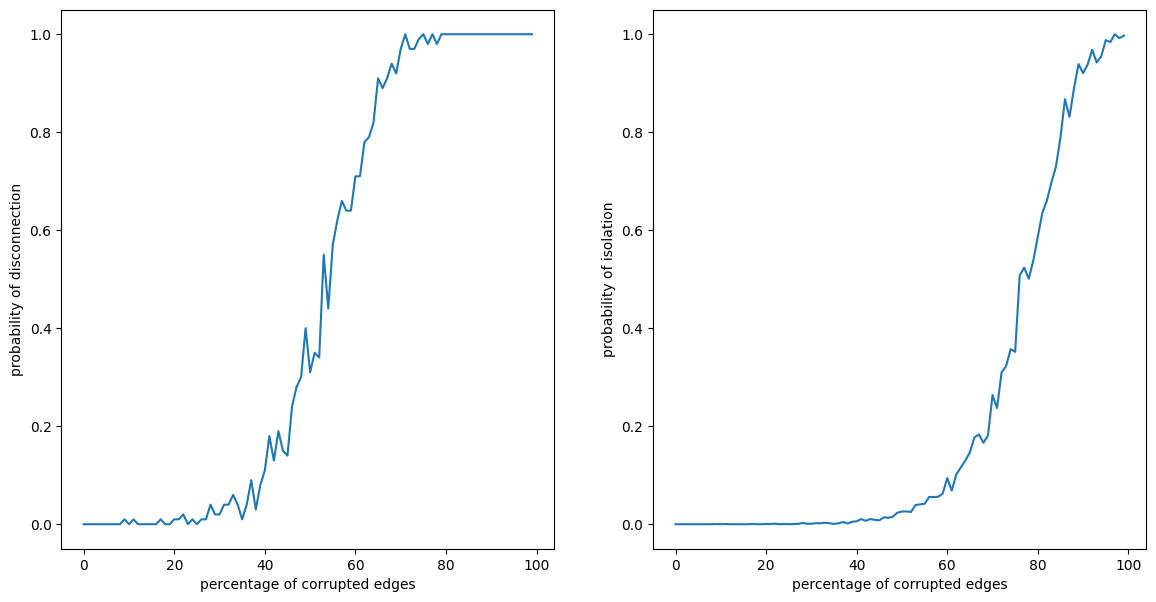

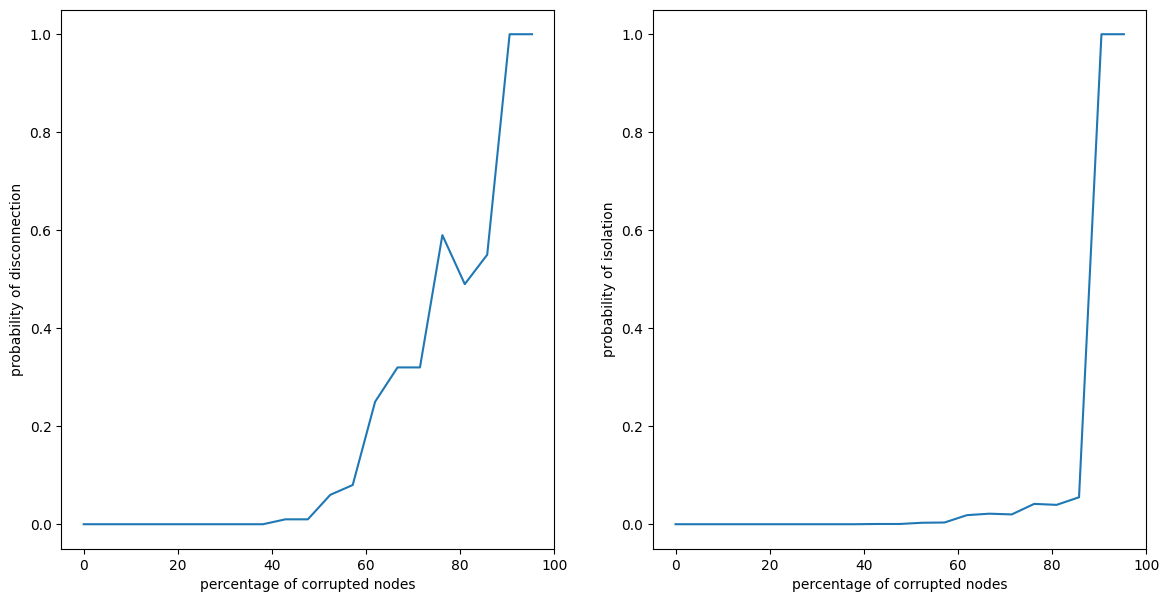

In [9]:
dis_edges_x_ER, dis_edges_y_ER, iso_edges_x_ER, iso_edges_y_ER = run(num_of_elimination=100,exp_repetition=100, mode=1, sub_mode=0, n=20, p=0.45)
dis_nodes_x_ER, dis_nodes_y_ER, iso_nodes_x_ER, iso_nodes_y_ER = run(num_of_elimination=21,exp_repetition=100, mode=1, sub_mode=1, n=20, p=0.45)

### **ER Directed**

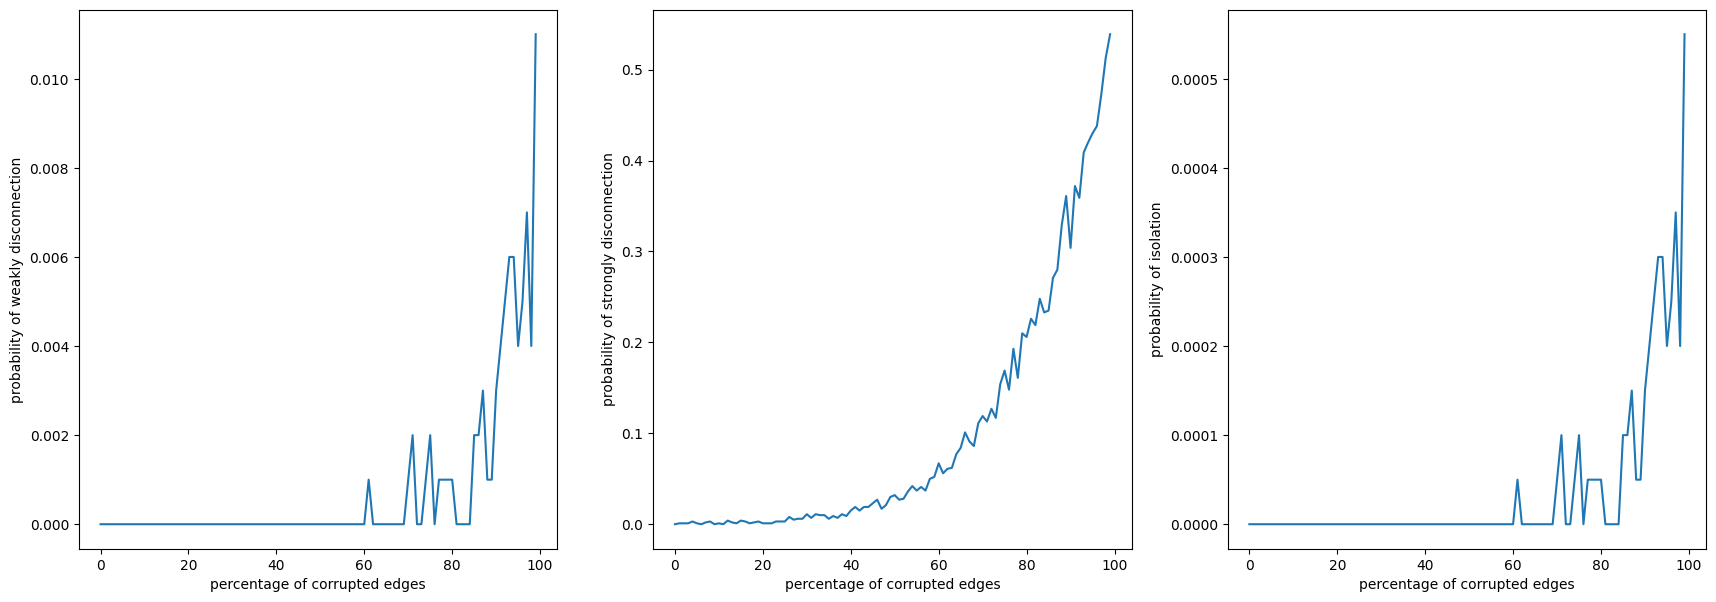

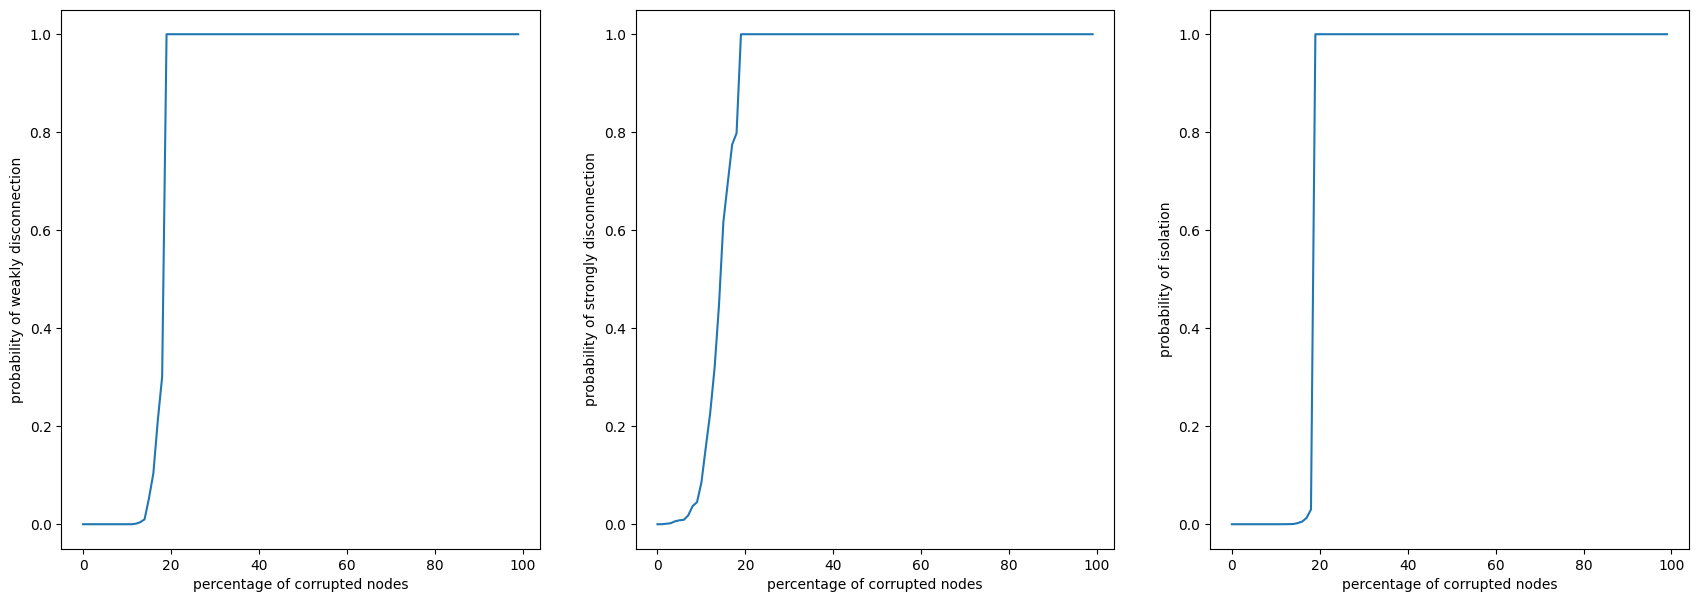

In [10]:
dis_w_edges_x_ERD, dis_w_edges_y_ERD, iso_edges_x_ERD, iso_edges_y_ERD, dis_s_edges_x_ERD, dis_s_edges_y_ERD = run(num_of_elimination=100,exp_repetition=1000, mode=4, sub_mode=0, n=20, p=0.45)
dis_w_nodes_x_ERD, dis_w_nodes_y_ERD, iso_nodes_x_ERD, iso_nodes_y_ERD, dis_s_nodes_x_ERD, dis_s_nodes_y_RED = run(num_of_elimination=100,exp_repetition=1000, mode=4, sub_mode=1, n=20, p=0.45)

### **BA**

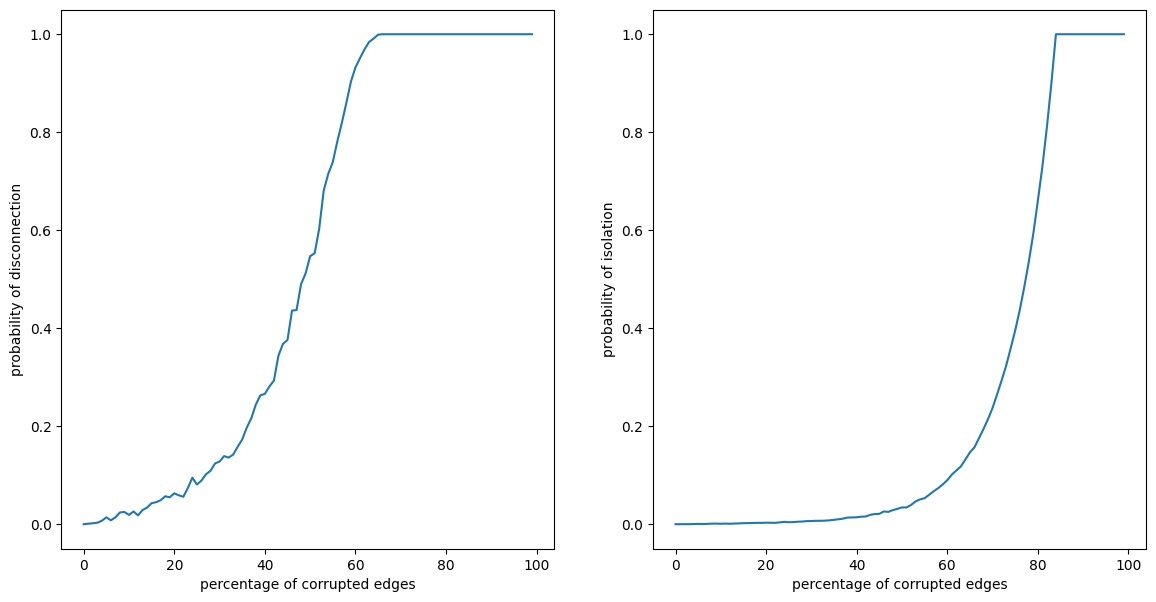

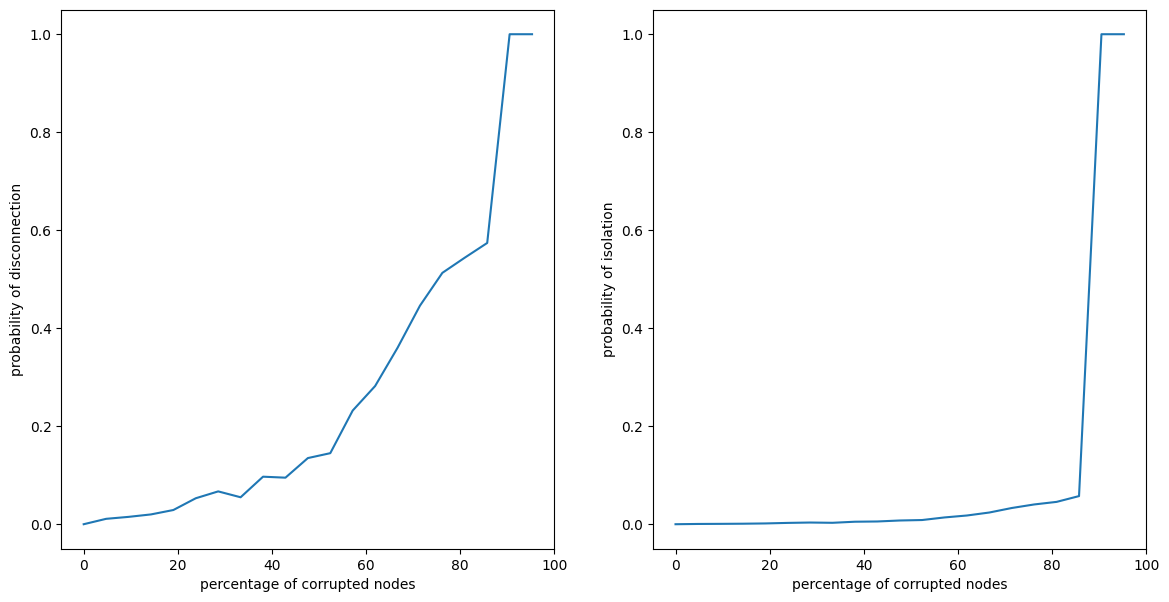

In [11]:
dis_edges_x_BA, dis_edges_y_BA, iso_edges_x_BA, iso_edges_y_BA = run(num_of_elimination=100,exp_repetition=1000, mode=2, sub_mode=0, n=20, m=6)
dis_nodes_x_BA, dis_nodes_y_BA, iso_nodes_x_BA, iso_nodes_y_BA = run(num_of_elimination=21,exp_repetition=1000, mode=2, sub_mode=1, n=20, m=6)


### **WS**

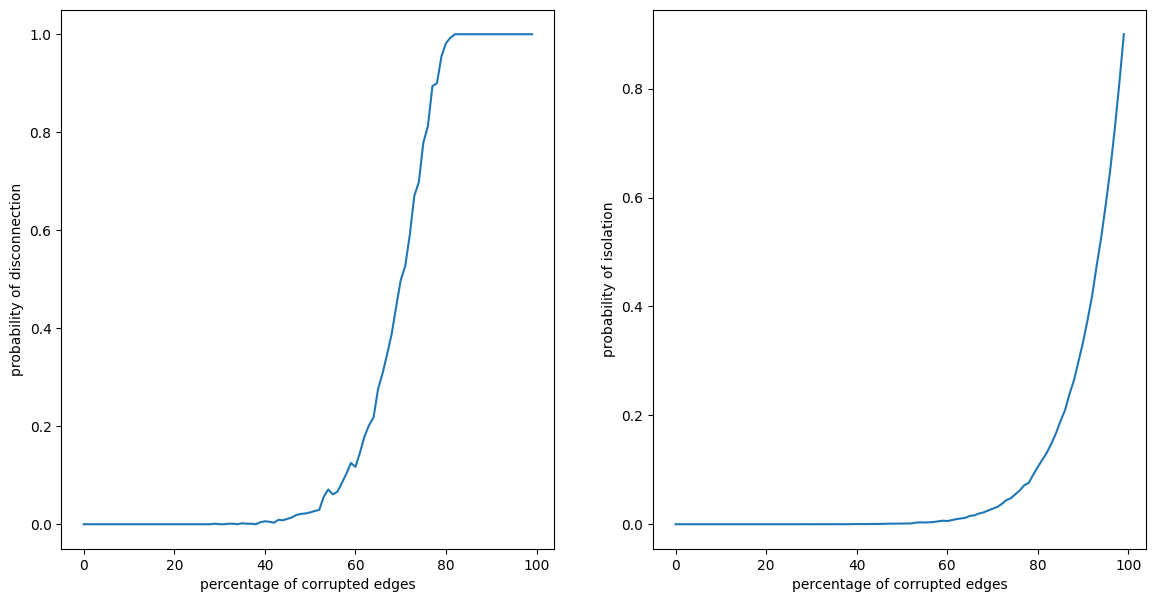

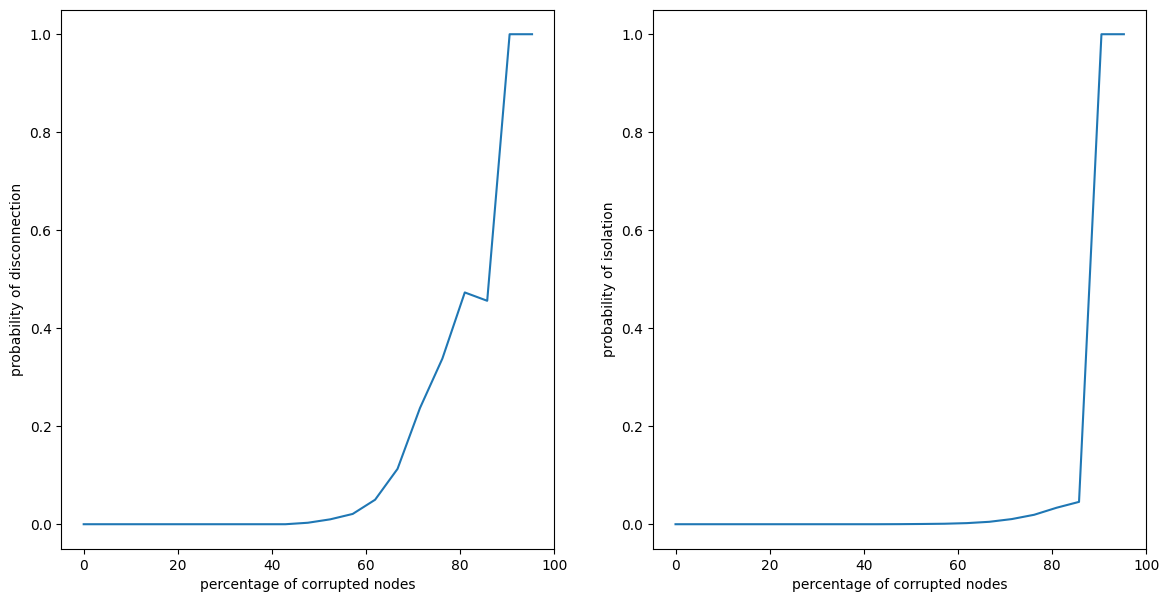

In [12]:
dis_edges_x_WS, dis_edges_y_WS, iso_edges_x_WS, iso_edges_y_WS = run(num_of_elimination=100,exp_repetition=1000, mode=3, sub_mode=0, n=20, p=0.45, k=10)
dis_nodes_x_WS, dis_nodes_y_WS, iso_nodes_x_WS, iso_nodes_y_WS = run(num_of_elimination=21,exp_repetition=1000, mode=3, sub_mode=1, n=20, p=0.45, k=10)
print()

### **Comaparison**

**Edges - Disconnection**

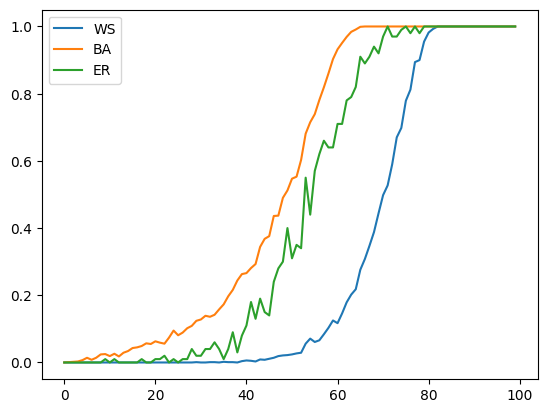

In [13]:
plt.plot(dis_edges_x_WS, dis_edges_y_WS, label='WS')
plt.plot(dis_edges_x_BA, dis_edges_y_BA, label='BA')
plt.plot(dis_edges_x_ER, dis_edges_y_ER, label='ER')
plt.legend(loc="upper left")
plt.show()

**Edges - Isolation**

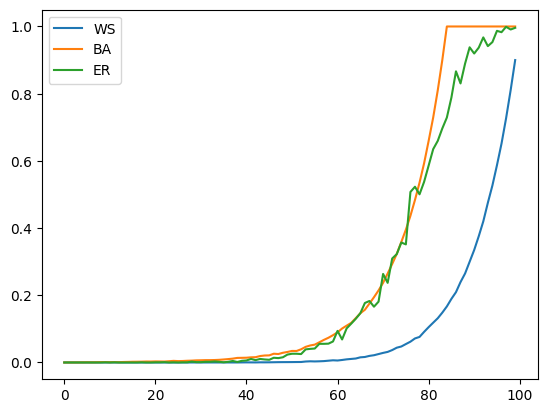

In [14]:
plt.plot(iso_edges_x_WS, iso_edges_y_WS, label="WS")
plt.plot(iso_edges_x_BA, iso_edges_y_BA, label="BA")
plt.plot(iso_edges_x_ER, iso_edges_y_ER, label="ER")
plt.legend(loc="upper left")
plt.show()

**Nodes - Disconnection**

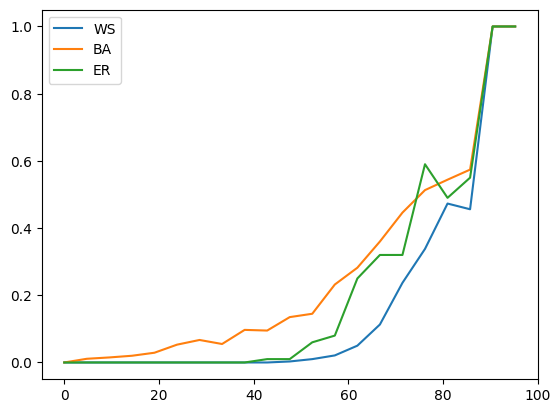

In [15]:
plt.plot(dis_nodes_x_WS, dis_nodes_y_WS, label="WS")
plt.plot(dis_nodes_x_BA, dis_nodes_y_BA, label="BA")
plt.plot(dis_nodes_x_ER, dis_nodes_y_ER, label="ER")
plt.legend(loc="upper left")
plt.show()

**Nodes - Isolation**

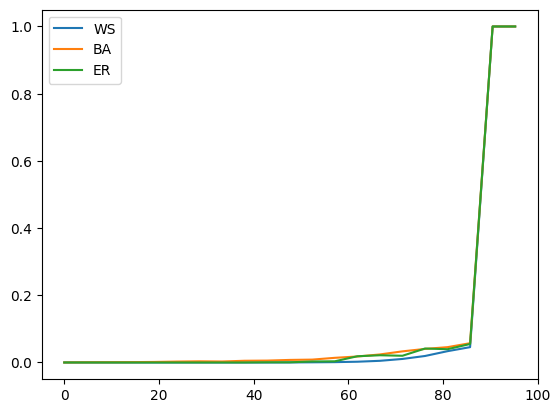

In [16]:
plt.plot(iso_nodes_x_WS, iso_nodes_y_WS, label="WS")
plt.plot(iso_nodes_x_BA, iso_nodes_y_BA, label="BA")
plt.plot(iso_nodes_x_ER, iso_nodes_y_ER, label="ER")
plt.legend(loc="upper left")
plt.show()

### ***Request4 & Test***

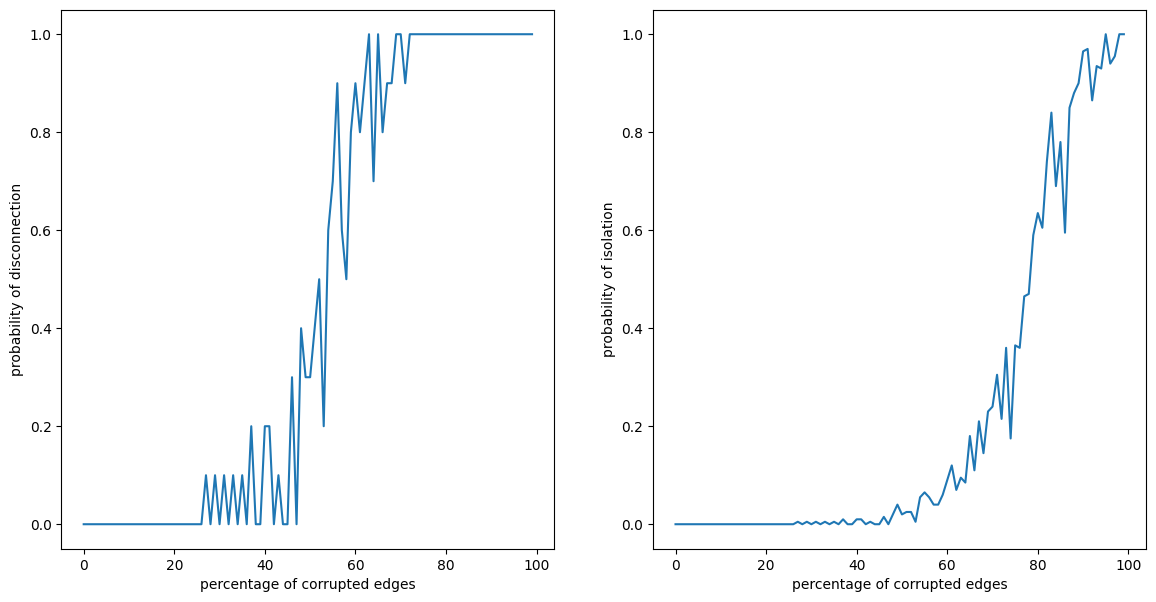

In [17]:
dis_edges_x_ER, dis_edges_y_ER, iso_edges_x_ER, iso_edges_y_ER = run(num_of_elimination=100,exp_repetition=10, mode=1, sub_mode=0, n=20, p=0.45)
print()

Sampling for 60th edge and the disconnectivity for ER indirected 

In [18]:
dis_edges_y_ER_mean = np.zeros(len(dis_edges_y_ER))
iso_edges_y_ER_mean = np.zeros(len(iso_edges_y_ER))

sample = []
sample = np.array(sample)

for i in range(100):
  dis_edges_x_ER, dis_edges_y_ER, iso_edges_x_ER, iso_edges_y_ER = run(num_of_elimination=100,exp_repetition=100, mode=1, sub_mode=0, n=20, p=0.45, is_draw=False)

  # print(dis_edges_y_ER[60])
  sample = np.append(sample, [dis_edges_y_ER[60]])

  dis_edges_y_ER_mean += dis_edges_y_ER
  iso_edges_y_ER_mean += iso_edges_y_ER

In [19]:
dis_edges_y_ER_mean_rolled = np.roll(dis_edges_y_ER_mean, 1)
dis_edges_y_ER_mean_rolled[0] = 0